Qiskit Density Matrix

In [207]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix, Kraus
from qiskit_aer import AerSimulator
import numpy as np

T1 = 10 ** -4
n_qubits = 1
exact_params = []
np_taus = np.linspace(10**-6, 10**-4, num=10)
taus = [round(float(tau), 16) for tau in np_taus]
print(np_taus)
T2 = np.arange(T1/10, 2*T1 + T1/10, T1/10)
for tau in taus:  
    exact_rho = []
    for T in T2:
        lam = 1/T - 1/(2*T1)
        p_amp = 1-np.exp(-tau/T1)
        p_phase = 1-np.exp(-lam*tau)

        #Kraus

        #Amplitude damping (T1)
        K1_amp = np.array([[1, 0], [0, np.sqrt(1 - p_amp)]])
        K2_amp = np.array([[0, np.sqrt(p_amp)], [0, 0]])
        amp_damping = Kraus([K1_amp, K2_amp])

        #Phase damping (T2)
        K1_phase = np.array([[np.sqrt(1 - p_phase), 0], [0, np.sqrt(1 - p_phase)]])
        K2_phase = np.array([[np.sqrt(p_phase), 0], [0, -np.sqrt(p_phase)]])
        phase_damping = Kraus([K1_phase, K2_phase])

        #Circuit

        qc = QuantumCircuit(n_qubits)

        #GHZ
        qc.h(0)
        # qc.cx(0, 1)

        #Add decoherence
        for qubit in range(n_qubits):
            qc.append(amp_damping.to_instruction(), [qubit])
            qc.append(phase_damping.to_instruction(), [qubit])

        qc.save_density_matrix()

        sim = AerSimulator(method='density_matrix')

        result = sim.run(qc).result()

        rho = np.array(result.data(0)['density_matrix'])
        # print("Final density matrix with manual gamma lambda noise:\n", DensityMatrix(rho))
        exact_rho.append(rho)

    exact_params.append(exact_rho)
print(T2)

[1.0e-06 1.2e-05 2.3e-05 3.4e-05 4.5e-05 5.6e-05 6.7e-05 7.8e-05 8.9e-05
 1.0e-04]
[1.0e-05 2.0e-05 3.0e-05 4.0e-05 5.0e-05 6.0e-05 7.0e-05 8.0e-05 9.0e-05
 1.0e-04 1.1e-04 1.2e-04 1.3e-04 1.4e-04 1.5e-04 1.6e-04 1.7e-04 1.8e-04
 1.9e-04 2.0e-04]


Statevector

In [208]:
'''
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Kraus, DensityMatrix
import numpy as np

# Parameters
T1 = 10 ** -5
n_qubits = 1
num_shots = 1000  # Number of noisy samples
statevector_params = []

np_taus = np.linspace(10**-6, 10**-5, num=10)
taus = [round(float(tau), 16) for tau in np_taus]
T2 = np.arange(T1/10, 2*T1, T1/10)

# Simulate each tau
for tau in taus:  
    exact_rho = []
    for T in T2:
        lam = 1/T - 1/(2*T1)
        p_amp = 1 - np.exp(-tau/T1)
        p_phase = 1 - np.exp(-2*lam*tau)

        # Define Kraus operators
        # Amplitude damping
        K1_amp = np.array([[1, 0], [0, np.sqrt(1 - p_amp)]])
        K2_amp = np.array([[0, np.sqrt(p_amp)], [0, 0]])
        amp_damping = [K1_amp, K2_amp]

        # Phase damping
        K1_phase = np.array([[np.sqrt(1 - p_phase), 0], [0, np.sqrt(1 - p_phase)]])
        K2_phase = np.array([[np.sqrt(p_phase), 0], [0, -np.sqrt(p_phase)]])
        phase_damping = [K1_phase, K2_phase]

        # Base state preparation
        qc = QuantumCircuit(n_qubits)
        qc.h(0)  # You can add more gates here (e.g., entangling)
        psi = Statevector(qc)

        # Noisy sampling
        noisy_density = np.zeros((2, 2), dtype=complex)

        for _ in range(num_shots):
            # Start from same state
            noisy_psi = psi

            # Sample amplitude damping Kraus
            probs = [
                np.linalg.norm(amp_damping[0] @ noisy_psi.data) ** 2,
                np.linalg.norm(amp_damping[1] @ noisy_psi.data) ** 2
            ]
            probs = np.array(probs)
            probs /= np.sum(probs)
            k_amp = amp_damping[np.random.choice([0, 1], p=probs)]


            # Sample phase damping Kraus
            # Compute and normalize probabilities
            probs = [
                np.linalg.norm(phase_damping[0] @ noisy_psi.data) ** 2,
                np.linalg.norm(phase_damping[1] @ noisy_psi.data) ** 2
            ]
            probs = np.array(probs)
            probs /= np.sum(probs)  # normalize to sum to 1

            # Sample Kraus operator
            k_phase = phase_damping[np.random.choice([0, 1], p=probs)]


            # Accumulate outer product
            noisy_density += np.outer(noisy_psi.data, np.conj(noisy_psi.data))

        # Normalize to form approximate density matrix
        noisy_density /= num_shots
        exact_rho.append(noisy_density)

    statevector_params.append(exact_rho)

print(T2)
'''

'\nfrom qiskit import QuantumCircuit\nfrom qiskit.quantum_info import Statevector, Kraus, DensityMatrix\nimport numpy as np\n\n# Parameters\nT1 = 10 ** -5\nn_qubits = 1\nnum_shots = 1000  # Number of noisy samples\nstatevector_params = []\n\nnp_taus = np.linspace(10**-6, 10**-5, num=10)\ntaus = [round(float(tau), 16) for tau in np_taus]\nT2 = np.arange(T1/10, 2*T1, T1/10)\n\n# Simulate each tau\nfor tau in taus:  \n    exact_rho = []\n    for T in T2:\n        lam = 1/T - 1/(2*T1)\n        p_amp = 1 - np.exp(-tau/T1)\n        p_phase = 1 - np.exp(-2*lam*tau)\n\n        # Define Kraus operators\n        # Amplitude damping\n        K1_amp = np.array([[1, 0], [0, np.sqrt(1 - p_amp)]])\n        K2_amp = np.array([[0, np.sqrt(p_amp)], [0, 0]])\n        amp_damping = [K1_amp, K2_amp]\n\n        # Phase damping\n        K1_phase = np.array([[np.sqrt(1 - p_phase), 0], [0, np.sqrt(1 - p_phase)]])\n        K2_phase = np.array([[np.sqrt(p_phase), 0], [0, -np.sqrt(p_phase)]])\n        phase_dampi

Stim + Pauli Twirling

In [209]:
import stim
import numpy as np

# Define Pauli matrices
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)
pauli_map = {'I': I, 'X': X, 'Y': Y, 'Z': Z}

def kronecker_all(pauli_string):
    """Kronecker product over all characters in pauli_string."""
    result = np.array([[1]], dtype=complex)
    for p in pauli_string:
        result = np.kron(result, pauli_map[p])
    return result

def tableau_to_density_matrix(t: stim.Tableau) -> np.ndarray:
    """Convert a stim.Tableau to a density matrix using canonical stabilizers."""
    s = stim.TableauSimulator()
    s.set_inverse_tableau(t)
    stabilizers = s.canonical_stabilizers()
    
    n = n_qubits
    dim = 1 << n
    rho = np.eye(dim, dtype=complex)
    for stab in stabilizers:
        stab = str(stab)
        sign = -1 if stab[0] == '-' else 1
        pauli_string = stab[1:]  # e.g., "-XZ" -> "XZ"
        S = kronecker_all(pauli_string)
        S *= sign

        proj = 0.5 * (np.eye(dim, dtype=complex) + S)
        rho = rho @ proj

    return rho

def apply_amp_damp_noise(sim: stim.TableauSimulator, qubit: int, p: float):
    """Apply random single-qubit depolarizing noise to a specific qubit."""
    rand = np.random.rand()
    if  rand < p/4:
        pauli = 'X'

        # Build full Pauli string over all qubits
        full_pauli = ['I'] * sim.num_qubits
        full_pauli[qubit] = pauli
        pauli_str = ''.join(full_pauli)

        sim.do(stim.PauliString(pauli_str))
    elif rand < p/2:
        pauli = 'Y'

        # Build full Pauli string over all qubits
        full_pauli = ['I'] * sim.num_qubits
        full_pauli[qubit] = pauli
        pauli_str = ''.join(full_pauli)

        sim.do(stim.PauliString(pauli_str))
    elif rand < 3*p/4:
        pauli = 'Z'

        # Build full Pauli string over all qubits
        full_pauli = ['I'] * sim.num_qubits
        full_pauli[qubit] = pauli
        pauli_str = ''.join(full_pauli)

        sim.do(stim.PauliString(pauli_str))

def apply_phase_damp_noise(sim: stim.TableauSimulator, qubit: int, p: float):
    """Apply random single-qubit depolarizing noise to a specific qubit."""

    if np.random.rand() < p/2:
        pauli = 'Z'

        # Build full Pauli string over all qubits
        full_pauli = ['I'] * sim.num_qubits
        full_pauli[qubit] = pauli
        pauli_str = ''.join(full_pauli)

        sim.do(stim.PauliString(pauli_str))


def generate_error_tableau(p_amp: float, p_phase: float) -> stim.Tableau:
    """Prepare Bell state, apply depolarizing noise, and return the stabilizer tableau."""
    sim = stim.TableauSimulator()

    # Prepare Bell state: (|00⟩ + |11⟩)/√2
    sim.h(0)
    # sim.cx(0, 1)

    for q in range(n_qubits):
        # Apply single-qubit depolarizing noise
        apply_amp_damp_noise(sim, q, p_amp)
        apply_phase_damp_noise(sim, q, p_phase)
    return sim.current_inverse_tableau()


# Parameters
num_shots = 1000   # number of random shots

# Generate tableaus and density matrices

stim_params = []
for tau in taus:  
    twirled = []
    for T in T2:
        stim_dms = []
        lam = 1/T - 1/(2*T1)
        p_amp = 1 - np.exp(-tau/T1)
        p_phase = 1 - np.exp(-2*lam*tau)
        for shot in range(num_shots):
            tableau = generate_error_tableau(p_amp, p_phase)
            rho = tableau_to_density_matrix(tableau)
            stim_dms.append(rho)
            # print(f"\n--- Shot {i+1} Density Matrix ---")
            # print(np.round(rho, 3))
        avg_stim = sum(stim_dms)/ num_shots
        twirled.append(avg_stim)
    stim_params.append(twirled)



STAB Sim Decomposition Script

In [210]:
import subprocess
import numpy as np

stab_params = []

# Compile the C++ program
compile_result = subprocess.run(
        ["g++", "damping_channel.cpp", "-o", "damping_channel"],
        capture_output=True, text=True
    )

for tau in taus:
    if compile_result.returncode != 0:
        print("Compilation failed:")
        print(compile_result.stderr)
    else:
        lines = []
        with subprocess.Popen(
            ["./damping_channel", str(tau), str(T1)],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
            bufsize=1 
        ) as proc:
            for line in proc.stdout:
                # print(line, end="")  
                lines.append(line.strip())

            # Wait for process to finish
            proc.wait()

            if proc.returncode != 0:
                error_output = proc.stderr.read()
                print("Runtime Error:")
                print(error_output)


    density_matrices = []
    i = 0
    while i < len(lines):
        if lines[i].startswith("T2="):
            T = float(lines[i].split("=")[1])
            i += 1
            data = list(map(float, lines[i].strip().split()))
            complex_vals = [complex(data[j], data[j+1]) for j in range(0, len(data), 2)]
            dim = int(len(complex_vals)**0.5)
            rho = np.array(complex_vals).reshape((dim, dim))
            density_matrices.append(rho)
        i += 1
    stab_params.append(density_matrices)

**STAB Sim Graph**

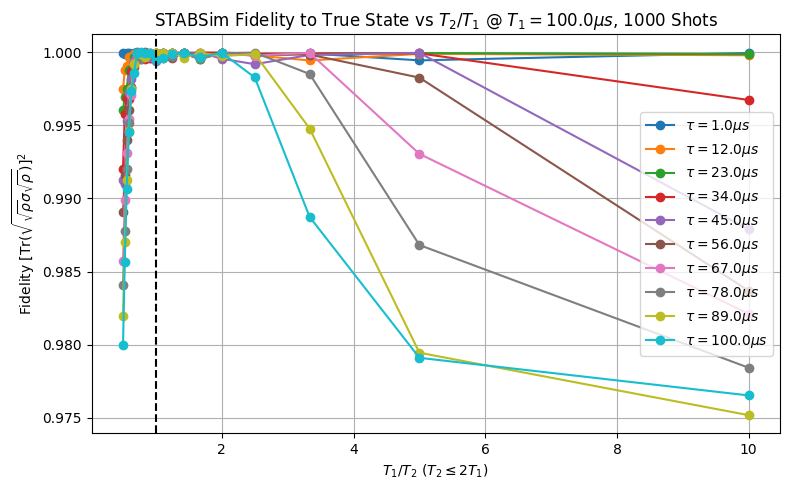

In [211]:
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# def clean_density_matrix(rho, eps=1e-12):
#     """Stabilize a nearly-valid density matrix."""
#     rho = (rho + rho.conj().T) / 2  # Enforce Hermitian
#     eigvals, eigvecs = np.linalg.eigh(rho)
#     eigvals = np.clip(eigvals, eps, None)  # Avoid zero or negative eigenvalues
#     rho = eigvecs @ np.diag(eigvals) @ eigvecs.conj().T
#     return rho / np.trace(rho)

# def stable_sqrtm(mat):
#     """Stable square root of a matrix, forcing Hermitian output."""
#     sqrt = sqrtm(mat)
#     if np.any(np.isnan(sqrt)) or np.any(np.isinf(sqrt)):
#         raise ValueError("sqrtm failed: produced NaNs or infs.")
#     return (sqrt + sqrt.conj().T) / 2  # Hermitian

def fidelity(rho, sigma):
    sqrt_rho = sqrtm(rho)
    inner = sqrtm(sqrt_rho @ sigma @ sqrt_rho)
    fid = (np.trace(inner)) ** 2
    return fid

# Assuming true_dms and approx_dms are already defined
# print(density_matrices)
# print(exact_rho)

tau_fidelities = []

# f = fidelity(exact_rho[.001], density_matrices[.001])
# print(f)
for i in range(len(taus)):
    fidelities = []
    for j in range(len(T2)):
        rho = np.real(exact_params[i][j])
        sigma = np.real(stab_params[i][j])
        f = fidelity(rho, sigma)
        fidelities.append(f)
    tau_fidelities.append(fidelities)

# print(exact_rho)
# print(density_matrices)
# print(tau_fidelities[0])

# Plot
plt.figure(figsize=(8, 5))

for i, fidelities in enumerate(tau_fidelities):
    plt.plot(T1/np.array(T2) , fidelities, marker='o', label=fr'$\tau = {round(10**6*taus[i], 2)}\mu s$')

plt.plot()

plt.axvline(x=1, color='black', linestyle='--')

plt.xlabel(r'$T_1/T_2$ ($T_2 \leq 2T_1$)')
plt.ylabel(r'Fidelity $[\mathrm{Tr}(\sqrt{\sqrt{\rho}\sigma\sqrt{\rho}})]^2$')
plt.title(rf'STABSim Fidelity to True State vs $T_2/T_1$ @ $T_1 ={10**6*T1}\mu s$, 1000 Shots')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#check diamond norm

**Stim Pauli Twirling Decomposition Graph**

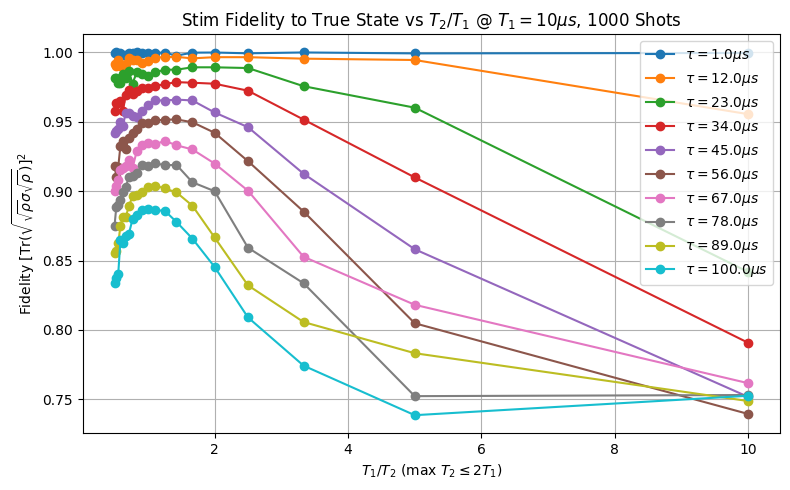

In [212]:
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# def clean_density_matrix(rho, eps=1e-12):
#     """Stabilize a nearly-valid density matrix."""
#     rho = (rho + rho.conj().T) / 2  # Enforce Hermitian
#     eigvals, eigvecs = np.linalg.eigh(rho)
#     eigvals = np.clip(eigvals, eps, None)  # Avoid zero or negative eigenvalues
#     rho = eigvecs @ np.diag(eigvals) @ eigvecs.conj().T
#     return rho / np.trace(rho)

# def stable_sqrtm(mat):
#     """Stable square root of a matrix, forcing Hermitian output."""
#     sqrt = sqrtm(mat)
#     if np.any(np.isnan(sqrt)) or np.any(np.isinf(sqrt)):
#         raise ValueError("sqrtm failed: produced NaNs or infs.")
#     return (sqrt + sqrt.conj().T) / 2  # Hermitian

def fidelity(rho, sigma):
    sqrt_rho = sqrtm(rho)
    inner = sqrtm(sqrt_rho @ sigma @ sqrt_rho)
    fid = (np.trace(inner)) ** 2
    return fid

# Assuming true_dms and approx_dms are already defined
# print(density_matrices)
# print(exact_rho)

tau_fidelities = []

# f = fidelity(exact_rho[.001], density_matrices[.001])
# print(f)
for i in range(len(taus)):
    fidelities = []
    for j, T in enumerate(T2):
        rho = np.real(exact_params[i][j])
        sigma = np.real(stim_params[i][j])
        f = fidelity(rho, sigma)
        fidelities.append(f)
    tau_fidelities.append(fidelities)

# print(exact_rho)
# print(density_matrices)
# print(tau_fidelities[0])

# Plot
plt.figure(figsize=(8, 5))

for i, fidelities in enumerate(tau_fidelities):
    plt.plot(T1/np.array(T2), fidelities, marker='o', label=fr'$\tau = {round(10**6*taus[i], 2)}\mu s$')

plt.xlabel(r'$T_1/T_2$ (max $T_2 \leq 2T_1$)')
plt.ylabel(r'Fidelity $[\mathrm{Tr}(\sqrt{\sqrt{\rho}\sigma\sqrt{\rho}})]^2$')
plt.title(r'Stim Fidelity to True State vs $T_2/T_1$ @ $T_1 = 10\mu s$, 1000 Shots')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

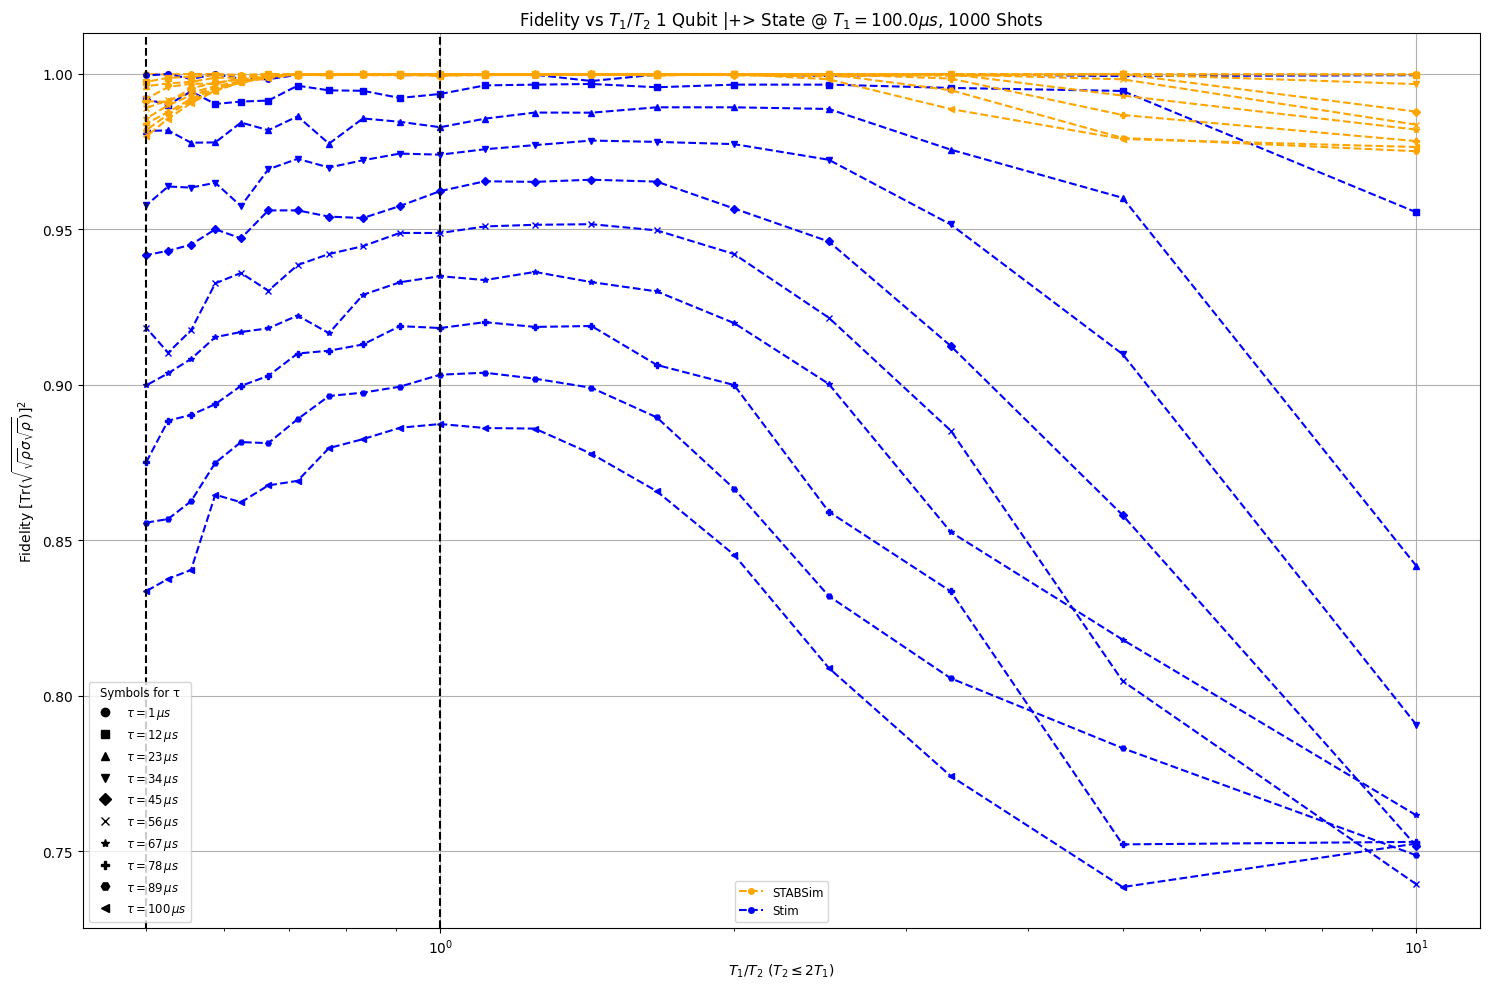

In [213]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm
from matplotlib.lines import Line2D

def fidelity(rho, sigma):
    sqrt_rho = sqrtm(rho)
    inner = sqrtm(sqrt_rho @ sigma @ sqrt_rho)
    fid = (np.trace(inner)) ** 2
    return np.real(fid)

# Example dummy data setup
# taus, T1, T2, exact_params, stim_params, stab_params must be defined before this point
# For illustration:
# taus = [1, 2, 3]
# T1 = 1
# T2 = np.array([1, 2, 3])
# exact_params = stim_params = stab_params = [[[np.eye(2)]*3]*3]  # Dummy structure

markers = ['o', 's', '^', 'v', 'D', 'x', '*', 'P', 'H', '<', '>']
markers = (markers * ((len(taus) // len(markers)) + 1))[:len(taus)]

colors = ['blue', 'orange']  # Group 1 (exact), Group 2 (stab)

plt.figure(figsize=(15, 10))
ax = plt.gca()

for i, tau in enumerate(taus):
    fidelities_stab = [
        fidelity(np.real(exact_params[i][j]), np.real(stab_params[i][j]))
        for j in range(len(T2))
    ]
    ax.plot(
        T1 / np.array(T2),
        fidelities_stab,
        color=colors[1],
        marker=markers[i],
        markersize=4,
        linewidth=1.5,
        linestyle='--',
        label='STABSim' if i == 0 else None  # Avoid repeating in legend
    )

    fidelities_stim = [
        fidelity(np.real(exact_params[i][j]), np.real(stim_params[i][j]))
        for j in range(len(T2))
    ]
    ax.plot(
        T1 / np.array(T2),
        fidelities_stim,
        color=colors[0],
        marker=markers[i],
        markersize=4,
        linewidth=1.5,
        linestyle='--',
        label='Stim' if i == 0 else None
    )

# Vertical reference lines
ax.axvline(x=1, color='black', linestyle='--')
ax.axvline(x=0.5, color='black', linestyle='--')

ax.set_xlabel(r'$T_1/T_2$ ($T_2 \leq 2T_1$)')
ax.set_ylabel(r'Fidelity $[\mathrm{Tr}(\sqrt{\sqrt{\rho}\sigma\sqrt{\rho}})]^2$')
ax.set_title(rf'Fidelity vs $T_1/T_2$ 1 Qubit |+> State @ $T_1 ={10**6*T1}\mu s$, 1000 Shots')

# Legend for Stim / STABSim
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend1 = ax.legend(by_label.values(), by_label.keys(), loc='lower center', fontsize='small')
ax.add_artist(legend1)

# Legend for tau markers
tau_marker_handles = [
    Line2D([0], [0], marker=markers[i], color='black', linestyle='None', label=fr'$\tau = {taus[i] * 1e6:.0f}\,\mu s$')
    for i in range(len(taus))
]
legend2 = ax.legend(
    tau_marker_handles,
    [fr"$\tau = {taus[i] * 1e6:.0f}\,\mu s$" for i in range(len(taus))],
    title="Symbols for τ",
    loc='lower left',
    fontsize='small',
    title_fontsize='small'
)

ax.set_xscale('log')
ax.grid(True)
plt.tight_layout()
plt.show()


In [214]:
'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm

def fidelity(rho, sigma):
    sqrt_rho = sqrtm(rho)
    inner = sqrtm(sqrt_rho @ sigma @ sqrt_rho)
    fid = (np.trace(inner)) ** 2
    return np.real(fid)

# Example marker cycle (one per tau)
markers = ['o', 's', '^', 'v', 'D', 'x', '*', 'P', 'H', '<', '>']
# Truncate or repeat if necessary
markers = (markers * ((len(taus) // len(markers)) + 1))[:len(taus)]

colors = ['blue', 'orange']  # Group 1 (exact), Group 2 (stab)

plt.figure(figsize=(15, 10))

for i, tau in enumerate(taus):
    # Group 1: exact_params
    fidelities_stab = [
        fidelity(np.real(exact_params[i][j]), np.real(stab_params[i][j]))
        for j in range(len(T2))
    ]
    plt.plot(
        T1 / np.array(T2),
        fidelities_stab,
        color=colors[1],
        marker=markers[i],
        markersize=4,  # Smaller marker
        linewidth=1.5,
        linestyle='--',
        label=fr'STABSim'
    )

    # Group 2: stab_params to another reference (if you have a second group)
    fidelities_stim = [
        fidelity(np.real(exact_params[i][j]), np.real(statevector_params[i][j]))
        for j in range(len(T2))
    ]
    plt.plot(
        T1 / np.array(T2),
        fidelities_stim,
        color=colors[0],
        marker=markers[i],
        markersize=4,
        linewidth=1.5,
        linestyle='--',
        label='SV'
    )

plt.axvline(x=1, color='black', linestyle='--')

plt.xlabel(r'$T_1/T_2$ ($T_2 \leq 2T_1$)')
plt.ylabel(r'Fidelity $[\mathrm{Tr}(\sqrt{\sqrt{\rho}\sigma\sqrt{\rho}})]^2$')
plt.title(rf'Fidelity vs $T_1/T_2$ 1 Qubit |+> State @ $T_1 ={10**6*T1}\mu s$, 1000 Shots')

# Only label the two groups once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower left', fontsize='small')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()
'''


<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_25695/2721841536.py:1: SyntaxWarning: invalid escape sequence '\l'
  '''


"\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom scipy.linalg import sqrtm\n\ndef fidelity(rho, sigma):\n    sqrt_rho = sqrtm(rho)\n    inner = sqrtm(sqrt_rho @ sigma @ sqrt_rho)\n    fid = (np.trace(inner)) ** 2\n    return np.real(fid)\n\n# Example marker cycle (one per tau)\nmarkers = ['o', 's', '^', 'v', 'D', 'x', '*', 'P', 'H', '<', '>']\n# Truncate or repeat if necessary\nmarkers = (markers * ((len(taus) // len(markers)) + 1))[:len(taus)]\n\ncolors = ['blue', 'orange']  # Group 1 (exact), Group 2 (stab)\n\nplt.figure(figsize=(15, 10))\n\nfor i, tau in enumerate(taus):\n    # Group 1: exact_params\n    fidelities_stab = [\n        fidelity(np.real(exact_params[i][j]), np.real(stab_params[i][j]))\n        for j in range(len(T2))\n    ]\n    plt.plot(\n        T1 / np.array(T2),\n        fidelities_stab,\n        color=colors[1],\n        marker=markers[i],\n        markersize=4,  # Smaller marker\n        linewidth=1.5,\n        linestyle='--',\n        label=fr'STABSim

**Trace Distance**

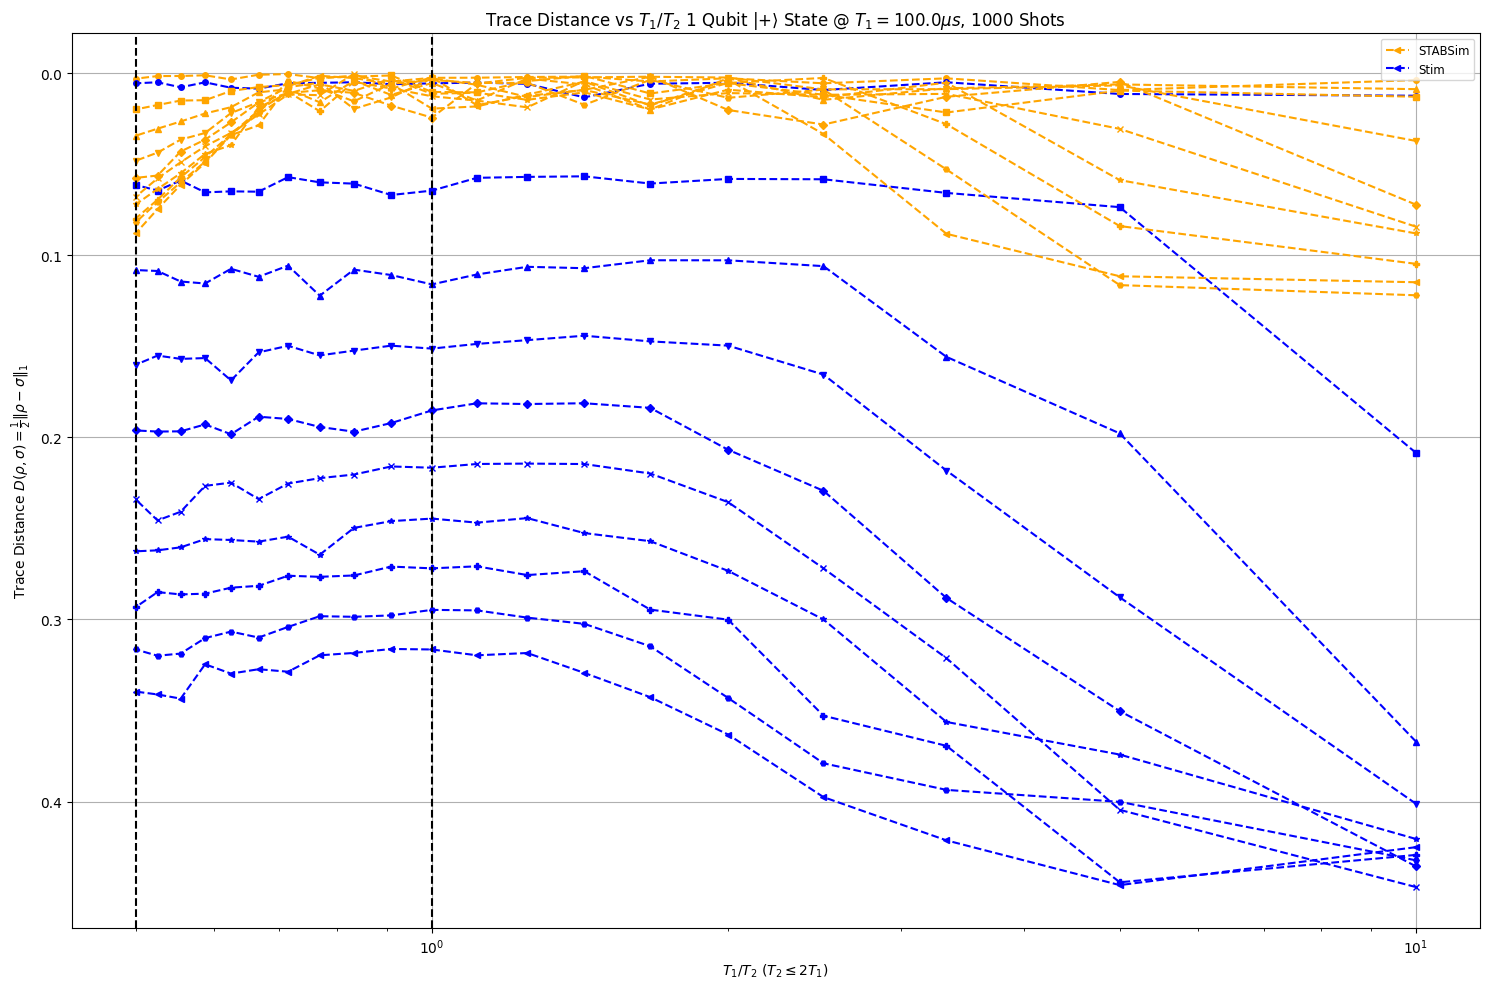

In [215]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm

def trace_distance(rho, sigma):
    delta = rho - sigma
    eigvals = np.linalg.eigvalsh(delta @ delta.conj().T)
    return 0.5 * np.sum(np.sqrt(np.maximum(eigvals, 0)))  # ensure non-negative due to numerical error

# Example marker cycle (one per tau)
markers = ['o', 's', '^', 'v', 'D', 'x', '*', 'P', 'H', '<', '>']
markers = (markers * ((len(taus) // len(markers)) + 1))[:len(taus)]
colors = ['blue', 'orange']  # Group 1 (exact), Group 2 (stab)

plt.figure(figsize=(15, 10))

for i, tau in enumerate(taus):
    # Group 1: trace distance between exact and stab
    distances_stab = [
        trace_distance(np.real(exact_params[i][j]), np.real(stab_params[i][j]))
        for j in range(len(T2))
    ]
    plt.plot(
        T1 / np.array(T2),
        distances_stab,
        color=colors[1],
        marker=markers[i],
        markersize=4,
        linewidth=1.5,
        linestyle='--',
        label='STABSim'
    )

    # Group 2: trace distance between exact and stim
    distances_stim = [
        trace_distance(np.real(exact_params[i][j]), np.real(stim_params[i][j]))
        for j in range(len(T2))
    ]
    plt.plot(
        T1 / np.array(T2),
        distances_stim,
        color=colors[0],
        marker=markers[i],
        markersize=4,
        linewidth=1.5,
        linestyle='--',
        label='Stim'
    )

plt.axvline(x=1, color='black', linestyle='--')
plt.axvline(x=.5, color='black', linestyle='--')
plt.xlabel(r'$T_1/T_2$ ($T_2 \leq 2T_1$)')
plt.ylabel(r'Trace Distance $D(\rho, \sigma) = \frac{1}{2}\|\rho - \sigma\|_1$')
plt.gca().invert_yaxis()

plt.title(rf'Trace Distance vs $T_1/T_2$ 1 Qubit |+⟩ State @ $T_1 ={10**6*T1}\mu s$, 1000 Shots')

# Only label the two groups once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize='small')

plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()